# Coursework Applied Advanced Optimisation

---
---

**Author:** Dr Giordano Scarciotti (g.scarciotti@imperial.ac.uk) - Imperial College London

**Module:** ELEC70066 - Applied Advanced Optimisation

**Version:** 1.1.1 - 29/01/2025

---
---

This coursework covers some of the so-called "geometric problems". These problems belong to an additional family of applications which complements Chapter $1$ (Approximation and Fitting) and Chapter $2$ (Statistical Estimation). Geometric problems cover many important applications, the most famous of which is machine learning. In fact, the popular Support Vector Machines are a family of classification methods which are nothing else than convex optimisation problems.

# Important instructions

You must read this section in its entirety before starting the coursework.

This coursework is intended to be an occasion for you to explore an optimisation topic in autonomy. The coursework is based on "Section $8.6$ Classification" of the reference book $[1]$ (link available on Blackboard). You are supposed to read that section to be able to complete the coursework.

You cannot use the sklearn library, nor any other library in which SVM or other classifiers are already implemented. The objective of the coursework is that you learn how these classifiers are obtained from scratch. This means that you will have to use your knowledge of Convex Optimisation and CVX to solve the questions directly.

You must copy this notebook to your drive; work on the file and submit the completed .ipynb file to Blackboard. Before submitting, make sure that you run all the code cells and save the notebook. This will ensure that the notebook looks exactly how you intend it to look. Obviously it is expected that your submission will have plenty of text cells in which you explain your work.

The coursework consists of 8 questions. Create a new section for each question.

Generally speaking, no help will be provided on the coursework besides clarifications on the wording of the text. You need to figure out by yourself how to solve the coursework. Note that after reading Section $8.6$ of the book, you will have all the required information to be able to solve the coursework.

The coursework is an individual piece of assessment. You can discuss it with other students, but you cannot develop solutions together and you cannot share code, text or figures. You cannot ask other people (including online forums) to solve any part of the coursework on your behalf. Standard plagiarisms policy will be applied.

The use of generative AI tools is not allowed.

# The problem and data

In pattern recognition and classification problems we are given two sets of points in $\mathbb{R}^n$, $\{x_1,\dots,x_N\}$ and $\{y_1,\dots,y_M\}$, and wish to find a function $f : \mathbb{R}^n \to \mathbb{R}$ (within a given family of functions) that is positive on the first set and negative on
the second, i.e.,

$$
f(x_i) > 0,\quad i = 1,\dots,N, \qquad f(y_i) < 0,\quad i = 1, \dots ,M.
$$

If these inequalities hold, we say that $f$ separates, classifies, or discriminates the two sets of points. This is an instance of supervised learning.

In the next subsections you will find $4$ datasets which will be used in the questions below. For datasets $1$, $2$ and $3$ you are given a "train set" and a "test set". You are supposed to develop your optimisation algorithm only on the train set. Do not use the test set for training/optimisation. The purpose of the test set is for you to test a posteriori how the classifier that you have obtained performs. For data set $4$, use the entire set in the optimisation (i.e. there is no test phase).

### Dataset 1

In [ ]:
# Dataset 1. DO NOT CHANGE THE NUMBERS
import numpy as np
X_train_1 = np.array([[ 1.75038375,  1.36985822,  0.73076475,  0.73666559,  0.34224149,
         1.09826685,  0.86211442,  1.24674778,  0.12887349,  0.35909321,
         0.35246291,  0.63681688,  0.54697422,  0.76350366,  1.5921626 ,
         0.51972449,  1.09117696,  1.42626192,  1.06227916,  0.21480643,
         1.42300815,  0.84256355,  1.7533684 ,  0.69974175,  0.76946708,
        -0.18379672,  1.0485532 ,  0.96472069,  1.31625354,  0.36578051,
         0.77772201,  1.64143191],
       [-0.16275141, -0.82300504, -1.30848519, -0.99270645, -1.81370696,
         2.8696898 , -1.06625993, -0.73442029,  0.50866809, -0.99408544,
         0.40021373, -0.10562573,  0.30068813, -0.18723889,  1.5299066 ,
         0.23149303,  0.21033337, -0.37766466,  1.7832445 ,  0.77048214,
         2.38601163, -0.12591569,  0.58083659, -0.21862494,  1.21901444,
        -0.70226941,  1.82745304,  1.02706123, -1.21456594, -0.04151123,
         0.57038679,  0.37708978]]).T

Y_train_1 = np.array([[-1.61978158, -1.42158013, -1.10032926, -0.84133058, -1.61746142,
        -1.37001245, -0.81530917, -2.19997218, -1.17612194,  0.28991103,
        -1.15223907, -0.20748713, -0.26374853, -1.38338996, -0.60422153,
        -0.6807668 , -0.49697651, -1.76927614, -1.07011443, -2.13637377,
        -0.97815482, -1.38615705,  0.16678405, -0.20236665, -0.52664181,
        -0.52065308, -1.06395708, -0.09375681],
       [ 1.29534095,  0.70877882,  0.22482794, -1.4081337 , -0.63963762,
         0.70944757, -0.21818498, -0.87909018,  0.23087154,  1.26274235,
         0.23315878, -1.08721924,  0.46586729, -0.64121136, -0.844737  ,
        -0.18690388, -0.71034608, -0.98534397,  0.18144543, -0.8120575 ,
         0.00244075, -0.28833748,  1.3720753 ,  0.34245524,  1.1515264 ,
         1.11200279,  0.38977343,  0.3943303 ]]).T

X_test_1 = np.array([[ 1.21290648,  0.60647149,  1.21197796,  1.54724686,  1.00972903,
         0.56216029,  0.72973515,  0.39284694,  0.17336897,  0.74244925,
         0.6168276 ,  0.91094238,  0.75389832,  1.22221484,  0.60651985,
         0.54111179,  0.91559423,  0.25201646],
       [-0.71869421, -1.12772433, -0.58861397, -0.0145585 , -1.45496704,
        -1.37186247,  0.35988092,  1.00862714,  0.30279016,  2.55054793,
         2.28438069, -0.35502465, -0.9418674 ,  0.89477983, -1.14724826,
        -0.7799858 ,  1.06303296, -0.55712765]]).T

Y_test_1 = np.array([[-1.19236589, -1.10995069,  0.37669071, -0.95531888, -0.89232474,
        -0.02095101, -0.29050649, -0.37881187, -0.99739798, -1.20639358,
        -0.54710686, -0.25815146, -1.136852  , -0.99897624, -0.78183458,
         0.21608231, -1.39421902, -0.85569085, -0.25452413, -2.08591412,
        -0.7539892 , -0.49801935],
       [-1.09011136,  1.87167148, -1.63772617, -0.20106049, -1.30309817,
         1.05833253, -0.04721317, -1.6502976 , -0.36833975, -1.2191319 ,
        -0.75123888,  0.43614121, -0.09030079, -1.32835851, -0.10259796,
        -0.04046664,  0.06085472,  0.119087  ,  0.81613417, -0.55277698,
        -1.03559666,  0.55011099]]).T

### Dataset 2

In [ ]:
# Dataset 2. DO NOT CHANGE THE NUMBERS
import numpy as np
X_train_2 = np.array([[-1.614901  ,  0.28714288, -1.58856523, -0.62398345, -1.24054186,
         1.3540726 , -1.8376991 , -0.76542848,  1.01551298,  1.56603302,
        -1.03332383, -0.65191468,  0.08107311,  1.1886501 ,  1.55395519,
         1.85121256, -0.38917117,  1.60296587, -1.29848704,  0.8441058 ,
         1.51105349,  1.30539824, -1.78357771, -0.07797286, -1.94890625,
        -0.67010608,  1.26205438, -0.64744794,  1.49213191, -1.32792377,
         0.40606432,  1.1654875 , -1.39691976, -1.53382165],
       [-0.74107291,  2.0226272 , -0.80311089, -1.93652965,  0.93944489,
        -0.76972033,  0.4438167 , -1.28950516, -0.54197248, -0.68859753,
         0.84952455, -1.46468159,  0.89980228, -0.73998096, -1.24199011,
        -0.004975  ,  1.22250794,  0.6042052 , -0.09834692,  1.90774378,
         1.21666545, -1.52465769,  1.46776645, -1.48563138,  0.92646412,
        -2.35182561,  1.08872015,  1.50066709,  1.54360638,  0.08300261,
         1.46244545,  0.42036718, -1.16291727,  1.21058973]]).T

Y_train_2 = np.array([[ 0.33752225,  0.26007797, -0.77360943, -0.80707957, -1.02059109,
         1.21402308, -1.05628487, -0.44228055, -0.40975282, -0.58552875,
         0.73242037,  0.60985187, -0.38448676, -1.10713613,  0.71019777,
         0.42445554,  0.54032669,  0.16261397, -0.7642942 , -0.0826362 ,
        -0.01755153, -1.33428073, -0.05495925,  0.971422  , -0.11024436,
         0.46940181],
       [ 0.1972156 , -0.40692781, -0.21251355, -0.38086556,  0.55460174,
        -0.00750315, -0.08248651,  0.79141975, -0.76573106,  0.28460164,
         0.75396732,  0.23217386,  0.97141896, -0.63721127,  0.41754396,
        -1.47865265, -0.11135927, -0.18183213, -0.03324034,  0.56319091,
        -0.84912994,  0.28134522,  0.52742495, -0.26947631,  0.44022805,
         0.77060324]]).T

X_test_2 = np.array([[-1.18919052,  1.86146486,  0.73290109, -1.02598963, -1.94986405,
         1.98413584, -0.22543794,  1.6738425 , -0.54083103,  0.23855336,
         0.29067775,  0.90452835, -0.7807143 ,  0.92563898,  0.5891893 ,
        -1.8506076 ],
       [ 1.01734226,  1.22983793, -1.32784027, -1.25200345, -1.11164531,
         0.11500191,  1.37788957, -0.04001507, -1.45583732,  1.64623486,
        -1.5711447 , -1.27852394,  1.32218203,  1.77824856, -1.83015366,
        -1.32219896]]).T

Y_test_2 = np.array([[ 0.44030401, -0.96934769,  0.83688707,  0.42107823, -0.64710246,
        -0.80688878, -0.17615909, -0.07870086,  0.37287753,  1.24256423,
        -0.07644516,  0.91728516,  1.4185267 , -0.57032662,  0.32910968,
        -0.62365553,  0.04200134, -0.05018494, -0.25026012,  0.30984256,
         0.13336253,  0.92133881, -0.76288057,  0.45065785],
       [ 0.9436088 , -0.72879255, -0.54252464, -0.95075636, -0.13248588,
        -0.59037888,  1.37253857,  0.75478021, -0.65673396, -0.31060961,
         0.37673711,  0.94192255, -0.24612582,  0.90276183, -0.88489523,
         0.05975249, -1.13783772, -0.72226809,  0.80242032,  0.47174672,
        -0.8985866 ,  0.59402413, -0.07023891, -0.97869024]]).T

### Dataset 3

In [ ]:
# Dataset 3. DO NOT CHANGE THE NUMBERS
import numpy as np
X_train_3 = np.array([[ 0.30920485,  0.74779523, -1.19805934, -1.4065875 ,  0.81773837,
        -1.30667592, -0.22120141,  0.07813527, -0.42443599,  0.03138162,
        -2.02716273, -0.20216417, -1.77093289,  0.19895122,  0.27524467,
        -0.9843448 , -0.31251963, -1.72018154, -2.05161935, -0.81445041,
         0.75566503, -1.61181827,  0.24942261,  0.43094924,  0.26285439,
        -1.49128776, -1.2378428 ,  0.15350841, -1.63601617, -0.03734756,
        -0.22413227],
       [-0.127041  ,  0.54957438,  1.40047603, -1.03687185,  1.64300265,
        -0.60711187,  1.00868763,  0.18433247,  1.30854456,  1.27867747,
        -0.07552655,  0.09829492, -0.15602456,  2.27694191,  0.58976897,
         1.29546509,  1.85361272, -0.11323539,  0.3295589 ,  0.03881959,
         0.62671139, -1.16122353,  0.37041953, -0.51610516,  0.08970487,
         0.68265883,  0.7264372 ,  0.8912278 ,  1.14409337,  0.53962298,
         0.94477311]]).T

Y_train_3 = np.array([[-0.48691402,  0.50954902,  1.35242892,  1.89600064, -0.33075371,
        -0.62663858, -0.85151619, -0.59739923,  0.15581821,  0.24130156,
         0.0081454 ,  1.01975478,  1.22467352,  0.51038341,  0.88796385,
         0.15940018, -0.1636123 ,  1.53916295, -0.6851801 , -0.42081847,
        -0.36004546,  1.10877664,  1.82124821, -0.04156698,  0.23092986,
         1.85584796, -0.34194837,  0.89063568, -0.99471418],
       [ 0.57259859, -1.66427178,  0.60859541, -0.42653506, -0.55325533,
        -0.45097084, -0.06022663,  0.27829883, -1.14573741, -1.74371889,
        -0.58656254, -0.39964896, -1.45537741, -1.09925804, -1.22007405,
        -1.05506347, -1.53782127, -0.40646646,  0.56462893, -1.03126372,
         0.03132026, -0.56596703, -0.46607732, -0.71850484, -1.16563865,
         0.39711336, -0.50298565, -0.73843955, -0.7858591 ]]).T

X_test_3 = np.array([[-1.55182484, -1.14359579, -0.28724359,  0.4860189 ,  0.59348201,
         0.20764271, -0.71978547, -0.52880272, -0.83190068, -0.17344159,
         0.11892081, -1.55268459, -0.97786341,  1.15004209, -1.55962329,
        -0.98048598, -0.73153577, -0.75993791, -0.22465612],
       [ 0.46910804,  0.76280671,  1.0525906 ,  1.96041925,  0.25278868,
         0.88856402,  1.72334673,  1.28542054,  0.93244079,  1.50362044,
         0.14210094, -0.3087488 ,  1.51041733, -0.46423271, -0.26480295,
         0.8478617 ,  1.24236135,  1.31112526,  1.70271788]]).T

Y_test_3 = np.array([[ 0.59260113, -0.87894137, -0.02974639,  1.7173351 , -0.09130345,
         1.31650323,  0.3712312 ,  1.39730283,  1.12756772,  0.62682189,
        -0.34408365,  1.33380816,  1.89457786, -0.31784745,  1.37086214,
         1.69531142, -0.53631325,  1.60097254,  0.98840214,  1.81872078,
         0.67050908],
       [-1.44842808,  0.65349306, -0.63475756, -0.17875463, -0.93824346,
        -1.10788814, -1.30192489,  0.39040035, -1.65289561, -2.14337167,
        -0.11501714, -0.73018114, -1.57392425, -1.493817  ,  0.22375044,
        -0.91174565, -0.20549059, -0.09531556, -1.75933045,  0.7346544 ,
        -1.01221609]]).T

### Dataset 4

In [ ]:
# Dataset 4. DO NOT CHANGE THE NUMBERS
import numpy as np
X_4 = np.array([[ 3.496052,  4.042794,  2.79643 ,  5.085416,  4.240754,  3.737034,
         3.343466,  3.786328,  4.965464,  3.826312,  4.208512,  4.620014,
         3.242036,  5.14892 ,  2.50782 ,  3.528098,  4.719288,  5.184396,
         5.086984,  3.900596],
       [-2.938138,  0.507444,  2.100728, -0.066346,  0.308112,  1.280272,
         3.851106,  0.200998,  0.104566, -1.468236, -2.356998,  2.863952,
         1.513512, -2.811326,  1.007538,  1.21716 ,  1.255772,  1.17943 ,
        -2.121112, -0.276458]]).T

Y_4 = np.array([[-4.47517 , -3.616592, -3.222338, -1.616118, -5.363638, -3.54466 ,
        -1.163848, -1.032822, -1.36367 , -1.990576, -1.959902, -0.24304 ,
        -1.288602, -0.81389 , -1.89679 , -1.068004, -2.55192 , -4.272996,
        -1.77429 ,  0.303408],
       [ 2.363466,  4.178916,  2.78908 ,  0.5145  ,  1.867194,  2.923438,
         4.613742,  0.950796,  0.377692,  1.884344,  1.461572, -0.978432,
         3.36434 ,  2.866108,  3.021634,  1.55918 ,  1.496068,  1.593088,
         2.453626,  1.409632]]).T

Z_4 = np.array([[ 1.710198,  2.58181 ,  0.581826, -2.765266,  2.969792,  1.069866,
        -1.743714,  1.217356,  2.143554, -2.254784, -3.259284,  2.706466,
         0.898268,  0.058898, -2.59896 , -3.25409 ,  4.040442, -3.34033 ,
        -3.096212, -0.716478],
       [-3.13698 , -4.892258, -3.686858, -4.64716 , -4.04887 , -3.83376 ,
        -4.468408, -4.850902, -3.36238 , -4.180288, -6.078254, -4.428228,
        -3.690582, -4.903822, -4.286912, -4.954782, -3.865414, -3.960376,
        -5.242314, -2.98557 ]]).T

# Questions

0.   Read Section $8.6$ of $[1]$.
1.   For dataset $1$, determine a standard support vector classifier with $\gamma = 0.1$ (notation from Section $8.6$ of the book). Plot the points, the classifier $f$ and the associated slab. **[10 marks]**

2.   Use the test set to assess how good the classifier is on unseen data. To this end, first define a "metric" (or more than one if you prefer) which numerically quantifies how good or bad a classifier is. Explain why you picked this metric and how the metric works. **[10 marks]**

3.   Discuss, possibly with the help of figures, the role of the parameter $\gamma$ and find for which $\gamma$ (or $\gamma$'s) your classifier behaves best on the test set. **[10 marks]**

4.   Now determine a linear classifier by approximating it via logistic modeling. Compare and discuss the results with those obtained in parts 1. 2. and 3. **[10 marks]**

5.   For dataset $2$, determine a standard support vector classifier with $\gamma=0.1$. Plot the points, the classifier $f$ and the associated slab. Score your classifier on the test set using your metric. **[5 marks]**

6.   Implement nonlinear classifiers for dataset $2$. There are many options here. Discuss as much as you can and try to find the best classifier among those which are obtainable by means of convex optimisation. The more details you provide to explain how you reached your final choice, the better. **[25 marks]**

7.   Repeat parts 5. and 6. on dataset 3. **[15 marks]**

8.   Dataset $4$ consists of three sets of points corresponding to three classes instead of two. Explain how you would go about finding a classifier for this case. Try to find a classifier and plot the points and the classifiers. Describe your results. **[15 marks]**

# Answers

*   Name:
*   Surname:
*   CID:

# Questions 1-4

In [ ]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

# Dataset 1
X_train_1 = np.array([
    [1.75038375, 1.36985822, 0.73076475, 0.73666559, 0.34224149, 1.09826685,
     0.86211442, 1.24674778, 0.12887349, 0.35909321, 0.35246291, 0.63681688,
     0.54697422, 0.76350366, 1.5921626, 0.51972449, 1.09117696, 1.42626192,
     1.06227916, 0.21480643, 1.42300815, 0.84256355, 1.7533684, 0.69974175,
     0.76946708, -0.18379672, 1.0485532, 0.96472069, 1.31625354, 0.36578051,
     0.77772201, 1.64143191],
    [-0.16275141, -0.82300504, -1.30848519, -0.99270645, -1.81370696, 2.8696898,
     -1.06625993, -0.73442029, 0.50866809, -0.99408544, 0.40021373, -0.10562573,
     0.30068813, -0.18723889, 1.5299066, 0.23149303, 0.21033337, -0.37766466,
     1.7832445, 0.77048214, 2.38601163, -0.12591569, 0.58083659, -0.21862494,
     1.21901444, -0.70226941, 1.82745304, 1.02706123, -1.21456594, -0.04151123,
     0.57038679, 0.37708978]
]).T

Y_train_1 = np.array([
    [-1.61978158, -1.42158013, -1.10032926, -0.84133058, -1.61746142, -1.37001245,
     -0.81530917, -2.19997218, -1.17612194, 0.28991103, -1.15223907, -0.20748713,
     -0.26374853, -1.38338996, -0.60422153, -0.6807668, -0.49697651, -1.76927614,
     -1.07011443, -2.13637377, -0.97815482, -1.38615705, 0.16678405, -0.20236665,
     -0.52664181, -0.52065308, -1.06395708, -0.09375681],
    [1.29534095, 0.70877882, 0.22482794, -1.4081337, -0.63963762, 0.70944757,
     -0.21818498, -0.87909018, 0.23087154, 1.26274235, 0.23315878, -1.08721924,
     0.46586729, -0.64121136, -0.844737, -0.18690388, -0.71034608, -0.98534397,
     0.18144543, -0.8120575, 0.00244075, -0.28833748, 1.3720753, 0.34245524,
     1.1515264, 1.11200279, 0.38977343, 0.3943303]
]).T

X_test_1 = np.array([[ 1.21290648,  0.60647149,  1.21197796,  1.54724686,  1.00972903,
         0.56216029,  0.72973515,  0.39284694,  0.17336897,  0.74244925,
         0.6168276 ,  0.91094238,  0.75389832,  1.22221484,  0.60651985,
         0.54111179,  0.91559423,  0.25201646],
       [-0.71869421, -1.12772433, -0.58861397, -0.0145585 , -1.45496704,
        -1.37186247,  0.35988092,  1.00862714,  0.30279016,  2.55054793,
         2.28438069, -0.35502465, -0.9418674 ,  0.89477983, -1.14724826,
        -0.7799858 ,  1.06303296, -0.55712765]]).T

Y_test_1 = np.array([[-1.19236589, -1.10995069,  0.37669071, -0.95531888, -0.89232474,
        -0.02095101, -0.29050649, -0.37881187, -0.99739798, -1.20639358,
        -0.54710686, -0.25815146, -1.136852  , -0.99897624, -0.78183458,
         0.21608231, -1.39421902, -0.85569085, -0.25452413, -2.08591412,
        -0.7539892 , -0.49801935],
       [-1.09011136,  1.87167148, -1.63772617, -0.20106049, -1.30309817,
         1.05833253, -0.04721317, -1.6502976 , -0.36833975, -1.2191319 ,
        -0.75123888,  0.43614121, -0.09030079, -1.32835851, -0.10259796,
        -0.04046664,  0.06085472,  0.119087  ,  0.81613417, -0.55277698,
        -1.03559666,  0.55011099]]).T

<ipython-input-341-5e66ee7e7913>:49: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z_vals, levels=[0], colors='black', linewidths=2, label="Decision Boundary")
<ipython-input-341-5e66ee7e7913>:52: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z_vals, levels=[-1, 1], colors='black', linestyles='dashed', linewidths=1, label="Slab Boundaries")


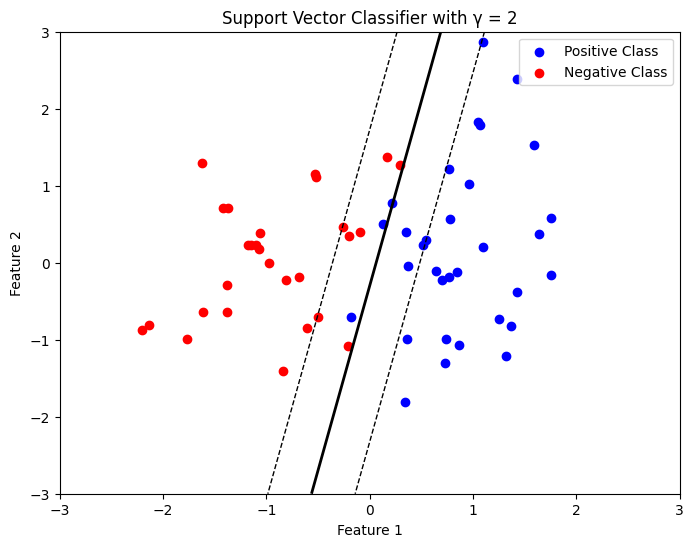

In [ ]:
### QUESTION 1 ###
# Define variables
d = X_train_1.shape[1]  # Dimensionality
a = cp.Variable(d)
b = cp.Variable()
u = cp.Variable(len(X_train_1), nonneg=True)
v = cp.Variable(len(Y_train_1), nonneg=True)

# Regularization parameter
gamma = 2

# Constraints
constraints = [
    X_train_1 @ a - b >= 1 - u,  # Positive class constraints
    Y_train_1 @ a - b <= -(1 - v),  # Negative class constraints
    u >= 0,
    v >= 0
]

# Objective function
objective = cp.Minimize(cp.sum_squares(a) + gamma * (cp.sum(u) + cp.sum(v)))

# Solve the optimisation problem
problem = cp.Problem(objective, constraints)
problem.solve()

# Extract the optimal values
a_opt = a.value
b_opt = b.value

# Plotting
plt.figure(figsize=(8, 6))

# Plot positive class
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], color='blue', label="Positive Class")

# Plot negative class
plt.scatter(Y_train_1[:, 0], Y_train_1[:, 1], color='red', label="Negative Class")

# Create a meshgrid
x_min, x_max = -3, 3
y_min, y_max = -3, 3
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = np.c_[xx.ravel(), yy.ravel()]
Z_vals = Z @ a_opt - b_opt
Z_vals = Z_vals.reshape(xx.shape)

# Plot decision boundary
plt.contour(xx, yy, Z_vals, levels=[0], colors='black', linewidths=2, label="Decision Boundary")

# Plot slab boundaries
plt.contour(xx, yy, Z_vals, levels=[-1, 1], colors='black', linestyles='dashed', linewidths=1, label="Slab Boundaries")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Support Vector Classifier with γ = 2")
plt.legend()
plt.show()

In [ ]:
### QUESTION 2 ###

#---TESTING---#

# Define proper class labels
y_train_labels = np.hstack([np.ones(len(X_train_1)), -np.ones(len(Y_train_1))])
y_test_labels = np.hstack([np.ones(len(X_test_1)), -np.ones(len(Y_test_1))])

# Combine test data
X_test_combined = np.vstack([X_test_1, Y_test_1])

# Compute predictions
predictions = np.sign(X_test_combined @ a_opt - b_opt)  # Decision rule

# Compute accuracy
accuracy = np.mean(predictions == y_test_labels)

# Compute precision, recall, and F1-score
true_positives = np.sum((predictions == 1) & (y_test_labels == 1))
false_positives = np.sum((predictions == 1) & (y_test_labels == -1))
false_negatives = np.sum((predictions == -1) & (y_test_labels == 1))

precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Compute hinge loss
hinge_loss = np.sum(np.maximum(0, 1 - y_test_labels * (X_test_combined @ a_opt - b_opt)))

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1_score:.4f}")
print(f"Hinge Loss: {hinge_loss:.4f}")

Accuracy: 0.9500
Precision: 0.9000
Recall: 1.0000
F1-score: 0.9474
Hinge Loss: 8.5461


Each of these analysis techniques plays an important role depending on the class of problem we are dealing with.
* Accuracy --> situations such as pandemics which could lead to disastrous consequences
* Precision --> situations such as fraud detection where false positives seriously event customer experience
* Hinge Loss --> when you need strong decision boundaries such as industrial quality control

In [ ]:
### QUESTION 3 ###

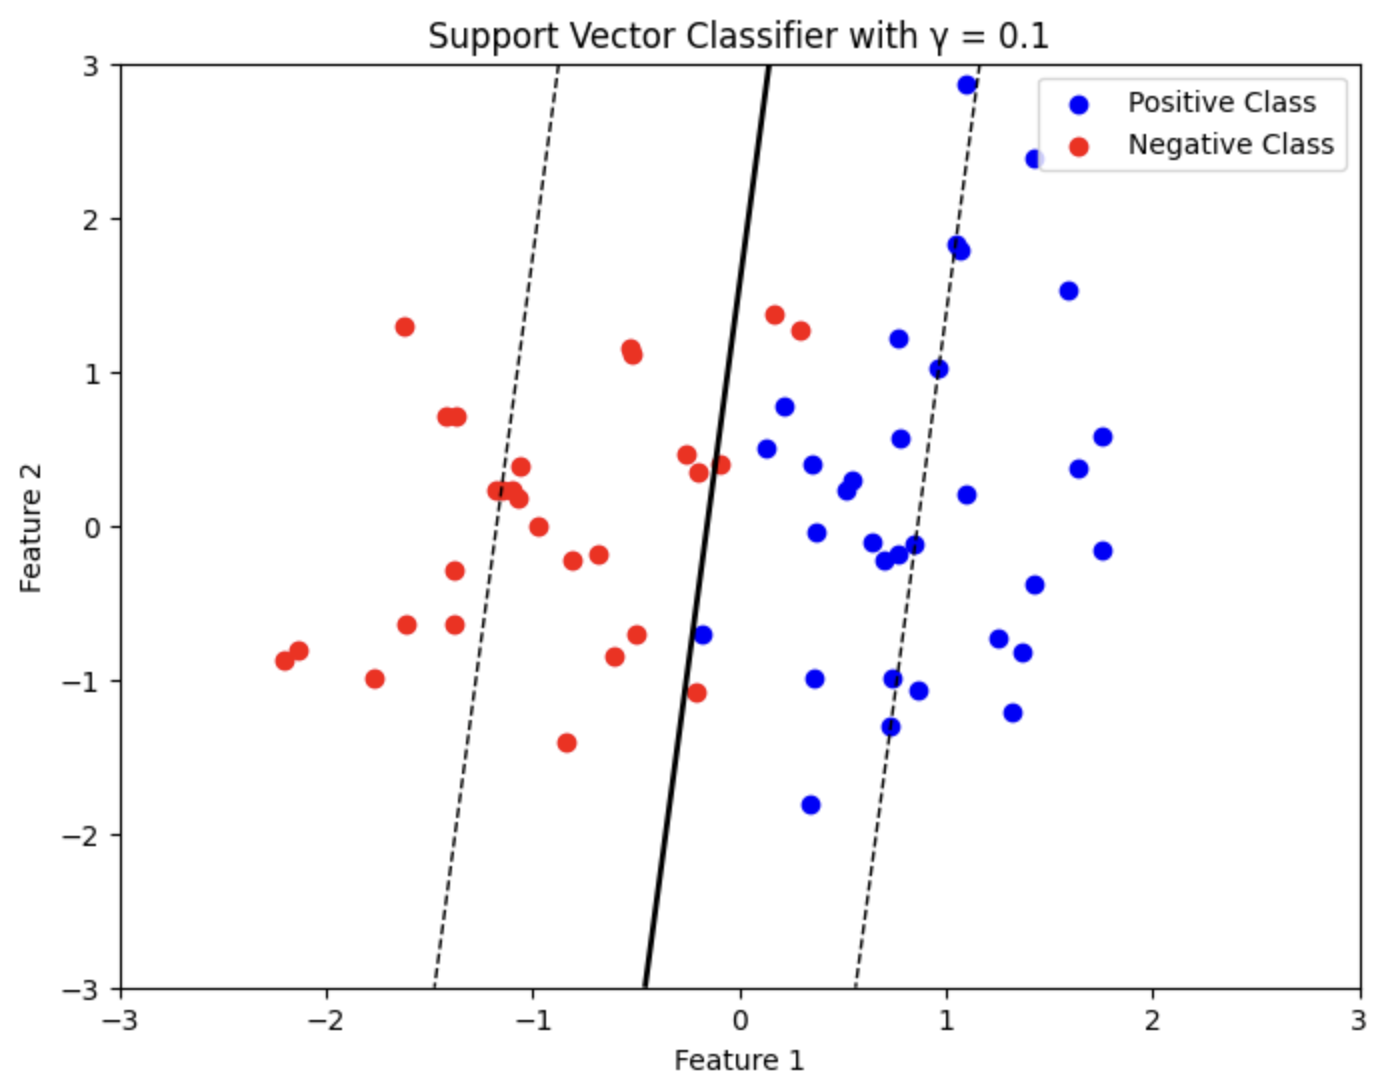

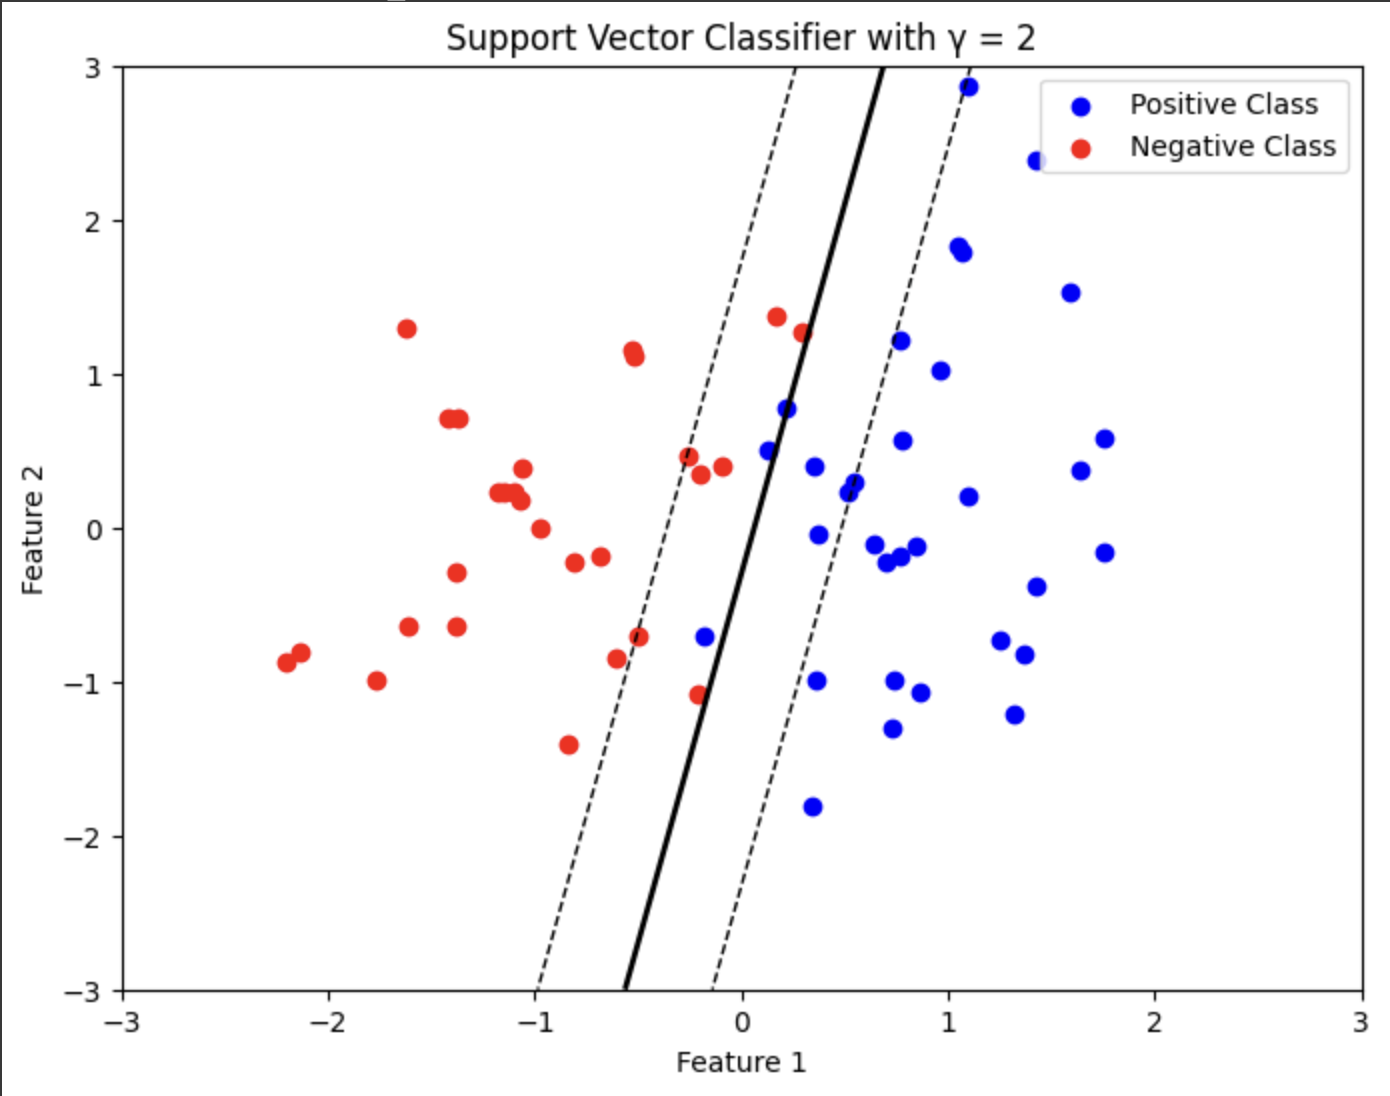

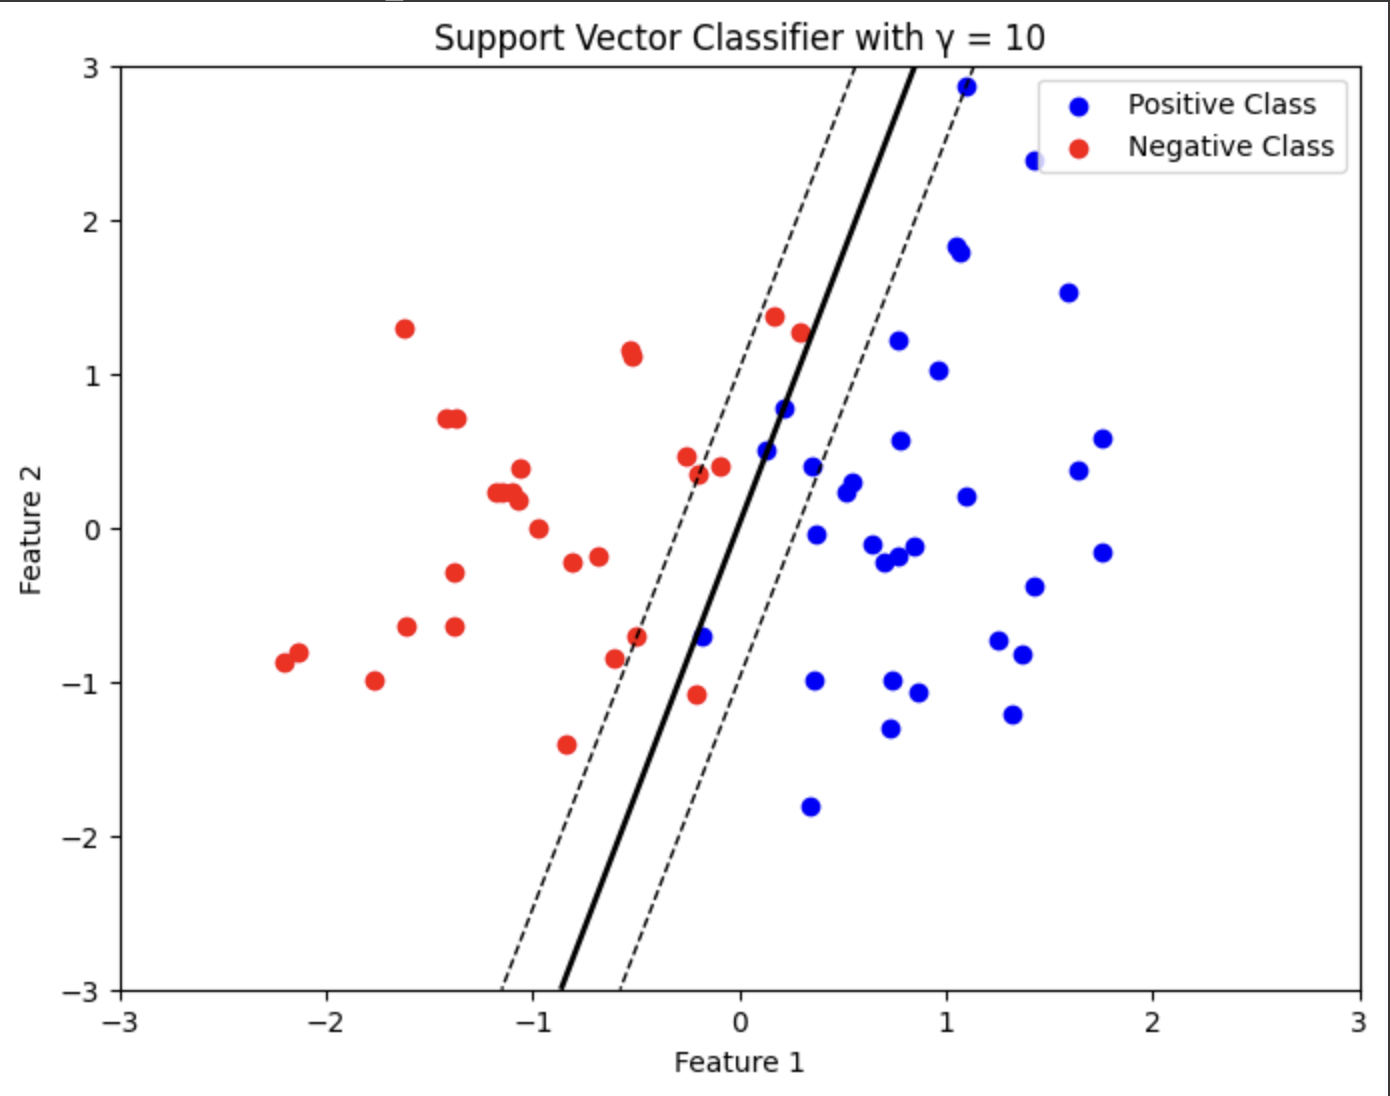

For question 3 we notice that by increasing gamma we decrease the width of the slab. This has the effect of penalising the relaxations terms more strongly, lowering their impact on the solution. Since this problem is well separated by a linear function, a high penalty term of 10 yields good results. This was the best solution that I found for the problem.

In [ ]:
### QUESTION 4 ###
# Combine training data
X_train_combined = np.vstack([X_train_1, Y_train_1])
y_train_labels = np.hstack([np.ones(len(X_train_1)), np.zeros(len(Y_train_1))])  # 1 for X, 0 for Y

# Define variables --- same setup as qu1-3
d = X_train_combined.shape[1]  # Dimensionality
a_logistic = cp.Variable(d)
b_logistic = cp.Variable()

# Log-likelihood function
log_likelihood = cp.sum(
    cp.multiply(y_train_labels, (X_train_combined @ a_logistic - b_logistic))
) - cp.sum(
    cp.log_sum_exp(
        cp.vstack([np.zeros(y_train_labels.shape), X_train_combined @ a_logistic - b_logistic]),
        axis=0
    )
)

# Objective function (maximise likelihood = minimise negative likelihood)
# Log function is helps with continuity of optimisation problem
objective = cp.Minimize(-log_likelihood)

# Solve the optimisation problem
problem = cp.Problem(objective)
problem.solve()

# Extract the optimal values
a_logistic_opt = a_logistic.value
b_logistic_opt = b_logistic.value

# Compute predictions on test set
X_test_combined = np.vstack([X_test_1, Y_test_1])
y_test_labels = np.hstack([np.ones(len(X_test_1)), np.zeros(len(Y_test_1))])

logistic_probabilities = 1 / (1 + np.exp(-(X_test_combined @ a_logistic_opt - b_logistic_opt)))
predictions = (logistic_probabilities >= 0.5).astype(int)  # Decision rule

# Compute accuracy
accuracy = np.mean(predictions == y_test_labels)

# Compute precision, recall, and F1-score
true_positives = np.sum((predictions == 1) & (y_test_labels == 1))
false_positives = np.sum((predictions == 1) & (y_test_labels == 0))
false_negatives = np.sum((predictions == 0) & (y_test_labels == 1))

precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Print results
print(f"Logistic Regression Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1_score:.4f}")

Logistic Regression Results:
Accuracy: 0.9500
Precision: 0.9000
Recall: 1.0000
F1-score: 0.9474


Using logistic modelling yielded the same results as the standard formulation for the problem. Initially cvxpy was unable to recognise the problem as convex, but by taking the negative log-likelihood. Np.zeros provides the problem with a baseline for the zero probability solution of 1.

# SKLEARN BENCHMARK TESTING

This is purely for benchmarking

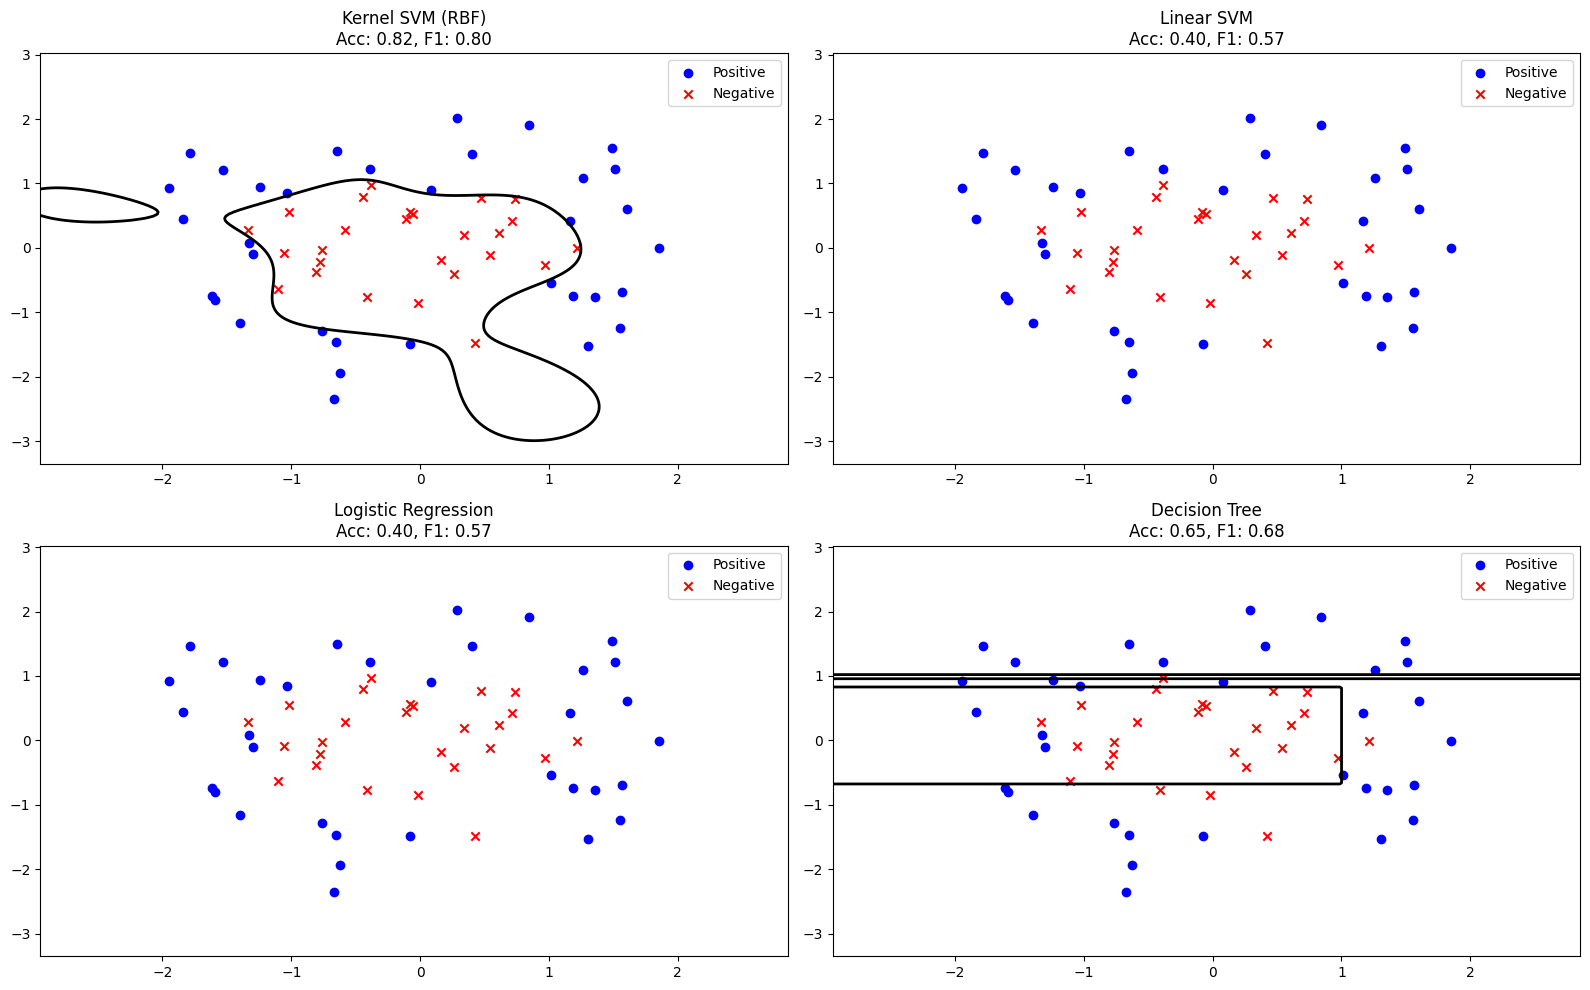

Performance Comparison:
Kernel SVM (RBF): Accuracy=0.82, Precision=0.74, Recall=0.88, F1=0.80
Linear SVM: Accuracy=0.40, Precision=0.40, Recall=1.00, F1=0.57
Logistic Regression: Accuracy=0.40, Precision=0.40, Recall=1.00, F1=0.57
Decision Tree: Accuracy=0.65, Precision=0.54, Recall=0.94, F1=0.68


In [ ]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

# For scikit-learn methods:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Given data
X_train_2 = np.array([[-1.614901  ,  0.28714288, -1.58856523, -0.62398345, -1.24054186,
         1.3540726 , -1.8376991 , -0.76542848,  1.01551298,  1.56603302,
        -1.03332383, -0.65191468,  0.08107311,  1.1886501 ,  1.55395519,
         1.85121256, -0.38917117,  1.60296587, -1.29848704,  0.8441058 ,
         1.51105349,  1.30539824, -1.78357771, -0.07797286, -1.94890625,
        -0.67010608,  1.26205438, -0.64744794,  1.49213191, -1.32792377,
         0.40606432,  1.1654875 , -1.39691976, -1.53382165],
       [-0.74107291,  2.0226272 , -0.80311089, -1.93652965,  0.93944489,
        -0.76972033,  0.4438167 , -1.28950516, -0.54197248, -0.68859753,
         0.84952455, -1.46468159,  0.89980228, -0.73998096, -1.24199011,
        -0.004975  ,  1.22250794,  0.6042052 , -0.09834692,  1.90774378,
         1.21666545, -1.52465769,  1.46776645, -1.48563138,  0.92646412,
        -2.35182561,  1.08872015,  1.50066709,  1.54360638,  0.08300261,
         1.46244545,  0.42036718, -1.16291727,  1.21058973]]).T

Y_train_2 = np.array([[ 0.33752225,  0.26007797, -0.77360943, -0.80707957, -1.02059109,
         1.21402308, -1.05628487, -0.44228055, -0.40975282, -0.58552875,
         0.73242037,  0.60985187, -0.38448676, -1.10713613,  0.71019777,
         0.42445554,  0.54032669,  0.16261397, -0.7642942 , -0.0826362 ,
        -0.01755153, -1.33428073, -0.05495925,  0.971422  , -0.11024436,
         0.46940181],
       [ 0.1972156 , -0.40692781, -0.21251355, -0.38086556,  0.55460174,
        -0.00750315, -0.08248651,  0.79141975, -0.76573106,  0.28460164,
         0.75396732,  0.23217386,  0.97141896, -0.63721127,  0.41754396,
        -1.47865265, -0.11135927, -0.18183213, -0.03324034,  0.56319091,
        -0.84912994,  0.28134522,  0.52742495, -0.26947631,  0.44022805,
         0.77060324]]).T

X_test_2 = np.array([[-1.18919052,  1.86146486,  0.73290109, -1.02598963, -1.94986405,
         1.98413584, -0.22543794,  1.6738425 , -0.54083103,  0.23855336,
         0.29067775,  0.90452835, -0.7807143 ,  0.92563898,  0.5891893 ,
        -1.8506076 ],
       [ 1.01734226,  1.22983793, -1.32784027, -1.25200345, -1.11164531,
         0.11500191,  1.37788957, -0.04001507, -1.45583732,  1.64623486,
        -1.5711447 , -1.27852394,  1.32218203,  1.77824856, -1.83015366,
        -1.32219896]]).T

Y_test_2 = np.array([[ 0.44030401, -0.96934769,  0.83688707,  0.42107823, -0.64710246,
        -0.80688878, -0.17615909, -0.07870086,  0.37287753,  1.24256423,
        -0.07644516,  0.91728516,  1.4185267 , -0.57032662,  0.32910968,
        -0.62365553,  0.04200134, -0.05018494, -0.25026012,  0.30984256,
         0.13336253,  0.92133881, -0.76288057,  0.45065785],
       [ 0.9436088 , -0.72879255, -0.54252464, -0.95075636, -0.13248588,
        -0.59037888,  1.37253857,  0.75478021, -0.65673396, -0.31060961,
         0.37673711,  0.94192255, -0.24612582,  0.90276183, -0.88489523,
         0.05975249, -1.13783772, -0.72226809,  0.80242032,  0.47174672,
        -0.8985866 ,  0.59402413, -0.07023891, -0.97869024]]).T

# ADD in metric for dataset 3

# Combining datasets and adding labels
X_train = np.vstack([X_train_2, Y_train_2])
y_train = np.hstack([np.ones(len(X_train_2)), -np.ones(len(Y_train_2))])

# Combine test data
X_test = np.vstack([X_test_2, Y_test_2])
y_test = np.hstack([np.ones(len(X_test_2)), -np.ones(len(Y_test_2))])

# We will also prepare versions for classifiers that require 0/1 labels.
y_train_01 = (y_train > 0).astype(int)
y_test_01 = (y_test > 0).astype(int)

# Create a meshgrid for plotting decision boundaries.
x_min, x_max = X_train[:, 0].min()-1, X_train[:, 0].max()+1
y_min, y_max = X_train[:, 1].min()-1, X_train[:, 1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

# Define a dictionary to store classifiers and results.
methods = {}

# 1. Kernel SVM (RBF)
clf_rbf = SVC(kernel='rbf', C=1e6)  # a high C for hard margin if possible
clf_rbf.fit(X_train, y_train)
y_pred_rbf = clf_rbf.predict(X_test)
methods['Kernel SVM (RBF)'] = {
    'classifier': clf_rbf,
    'y_pred': y_pred_rbf,
    'accuracy': accuracy_score(y_test, y_pred_rbf),
    'precision': precision_score(y_test, y_pred_rbf, pos_label=1),
    'recall': recall_score(y_test, y_pred_rbf, pos_label=1),
    'f1': f1_score(y_test, y_pred_rbf, pos_label=1)
}

# 2. Linear SVM (using a linear kernel)
clf_lin = SVC(kernel='linear', C=1e6)
clf_lin.fit(X_train, y_train)
y_pred_lin = clf_lin.predict(X_test)
methods['Linear SVM'] = {
    'classifier': clf_lin,
    'y_pred': y_pred_lin,
    'accuracy': accuracy_score(y_test, y_pred_lin),
    'precision': precision_score(y_test, y_pred_lin, pos_label=1),
    'recall': recall_score(y_test, y_pred_lin, pos_label=1),
    'f1': f1_score(y_test, y_pred_lin, pos_label=1)
}

# 3. Logistic Regression
clf_log = LogisticRegression(solver='newton-cg')  # Newton's method
clf_log.fit(X_train, y_train_01)  # uses 0/1 labels
y_pred_log = clf_log.predict(X_test)
# Convert back to ±1 for consistency: map 1->+1, 0->-1.
y_pred_log_pm = np.where(y_pred_log==1, 1, -1)
methods['Logistic Regression'] = {
    'classifier': clf_log,
    'y_pred': y_pred_log_pm,
    'accuracy': accuracy_score(y_test, y_pred_log_pm),
    'precision': precision_score(y_test, y_pred_log_pm, pos_label=1),
    'recall': recall_score(y_test, y_pred_log_pm, pos_label=1),
    'f1': f1_score(y_test, y_pred_log_pm, pos_label=1)
}

# 4. Decision Tree (Piecewise linear)
clf_tree = DecisionTreeClassifier(max_depth=3)
clf_tree.fit(X_train, y_train_01)  # using 0/1 labels
y_pred_tree = clf_tree.predict(X_test)
y_pred_tree_pm = np.where(y_pred_tree==1, 1, -1)
methods['Decision Tree'] = {
    'classifier': clf_tree,
    'y_pred': y_pred_tree_pm,
    'accuracy': accuracy_score(y_test, y_pred_tree_pm),
    'precision': precision_score(y_test, y_pred_tree_pm, pos_label=1),
    'recall': recall_score(y_test, y_pred_tree_pm, pos_label=1),
    'f1': f1_score(y_test, y_pred_tree_pm, pos_label=1)
}

# Decision Boundaries
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for idx, (name, info) in enumerate(methods.items()):
    ax = axes[idx]

    # Plot training points
    ax.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1],
               color='blue', marker='o', label='Positive')
    ax.scatter(X_train[y_train==-1, 0], X_train[y_train==-1, 1],
               color='red', marker='x', label='Negative')

    # Decision boundary depends on classifier type.
    if name in ['Kernel SVM (RBF)', 'Linear SVM', 'Logistic Regression']:
        # Use the classifier's decision_function (or predict_proba)
        if hasattr(info['classifier'], "decision_function"):
            Z = info['classifier'].decision_function(grid).reshape(xx.shape)
        else:
            # For logistic regression (if decision_function not available)
            Z = info['classifier'].predict_proba(grid)[:, 1].reshape(xx.shape)
        cs = ax.contour(xx, yy, Z, levels=[0], colors='black', linewidths=2)
    elif name == 'Decision Tree':
        Z = info['classifier'].predict(grid).reshape(xx.shape)
        # For tree, draw a contour at 0.5 probability threshold:
        cs = ax.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)

    ax.set_title(f"{name}\nAcc: {info['accuracy']:.2f}, F1: {info['f1']:.2f}")
    ax.legend()

for j in range(idx+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# Performance metrics
print("Performance Comparison:")
for name, info in methods.items():
    print(f"{name}: Accuracy={info['accuracy']:.2f}, Precision={info['precision']:.2f}, "
          f"Recall={info['recall']:.2f}, F1={info['f1']:.2f}")

# Questions 5-6

In [ ]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

# Dataset 2
X_train_2 = np.array([[-1.614901  ,  0.28714288, -1.58856523, -0.62398345, -1.24054186,
         1.3540726 , -1.8376991 , -0.76542848,  1.01551298,  1.56603302,
        -1.03332383, -0.65191468,  0.08107311,  1.1886501 ,  1.55395519,
         1.85121256, -0.38917117,  1.60296587, -1.29848704,  0.8441058 ,
         1.51105349,  1.30539824, -1.78357771, -0.07797286, -1.94890625,
        -0.67010608,  1.26205438, -0.64744794,  1.49213191, -1.32792377,
         0.40606432,  1.1654875 , -1.39691976, -1.53382165],
       [-0.74107291,  2.0226272 , -0.80311089, -1.93652965,  0.93944489,
        -0.76972033,  0.4438167 , -1.28950516, -0.54197248, -0.68859753,
         0.84952455, -1.46468159,  0.89980228, -0.73998096, -1.24199011,
        -0.004975  ,  1.22250794,  0.6042052 , -0.09834692,  1.90774378,
         1.21666545, -1.52465769,  1.46776645, -1.48563138,  0.92646412,
        -2.35182561,  1.08872015,  1.50066709,  1.54360638,  0.08300261,
         1.46244545,  0.42036718, -1.16291727,  1.21058973]]).T

Y_train_2 = np.array([[ 0.33752225,  0.26007797, -0.77360943, -0.80707957, -1.02059109,
         1.21402308, -1.05628487, -0.44228055, -0.40975282, -0.58552875,
         0.73242037,  0.60985187, -0.38448676, -1.10713613,  0.71019777,
         0.42445554,  0.54032669,  0.16261397, -0.7642942 , -0.0826362 ,
        -0.01755153, -1.33428073, -0.05495925,  0.971422  , -0.11024436,
         0.46940181],
       [ 0.1972156 , -0.40692781, -0.21251355, -0.38086556,  0.55460174,
        -0.00750315, -0.08248651,  0.79141975, -0.76573106,  0.28460164,
         0.75396732,  0.23217386,  0.97141896, -0.63721127,  0.41754396,
        -1.47865265, -0.11135927, -0.18183213, -0.03324034,  0.56319091,
        -0.84912994,  0.28134522,  0.52742495, -0.26947631,  0.44022805,
         0.77060324]]).T

X_test_2 = np.array([[-1.18919052,  1.86146486,  0.73290109, -1.02598963, -1.94986405,
         1.98413584, -0.22543794,  1.6738425 , -0.54083103,  0.23855336,
         0.29067775,  0.90452835, -0.7807143 ,  0.92563898,  0.5891893 ,
        -1.8506076 ],
       [ 1.01734226,  1.22983793, -1.32784027, -1.25200345, -1.11164531,
         0.11500191,  1.37788957, -0.04001507, -1.45583732,  1.64623486,
        -1.5711447 , -1.27852394,  1.32218203,  1.77824856, -1.83015366,
        -1.32219896]]).T

Y_test_2 = np.array([[ 0.44030401, -0.96934769,  0.83688707,  0.42107823, -0.64710246,
        -0.80688878, -0.17615909, -0.07870086,  0.37287753,  1.24256423,
        -0.07644516,  0.91728516,  1.4185267 , -0.57032662,  0.32910968,
        -0.62365553,  0.04200134, -0.05018494, -0.25026012,  0.30984256,
         0.13336253,  0.92133881, -0.76288057,  0.45065785],
       [ 0.9436088 , -0.72879255, -0.54252464, -0.95075636, -0.13248588,
        -0.59037888,  1.37253857,  0.75478021, -0.65673396, -0.31060961,
         0.37673711,  0.94192255, -0.24612582,  0.90276183, -0.88489523,
         0.05975249, -1.13783772, -0.72226809,  0.80242032,  0.47174672,
        -0.8985866 ,  0.59402413, -0.07023891, -0.97869024]]).T

<ipython-input-347-2d8a1169694b>:49: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z_vals, levels=[0], colors='black', linewidths=2, label="Decision Boundary")
<ipython-input-347-2d8a1169694b>:52: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z_vals, levels=[-1, 1], colors='black', linestyles='dashed', linewidths=1, label="Slab Boundaries")


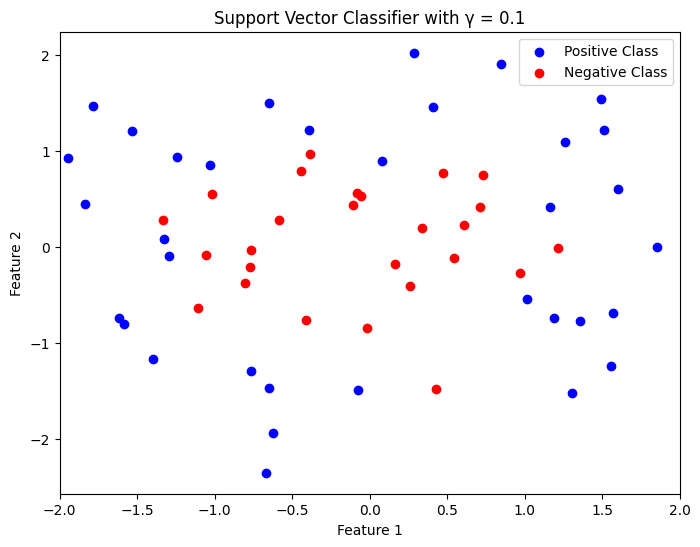

Accuracy: 0.4000
Precision: 0.4000
Recall: 1.0000
F1-score: 0.5714
Hinge Loss: 48.0000


In [ ]:
### QUESTION 5 ###
# Define variables
d = X_train_2.shape[1]  # Dimensionality
a = cp.Variable(d)
b = cp.Variable()
u = cp.Variable(len(X_train_2), nonneg=True)
v = cp.Variable(len(Y_train_2), nonneg=True)

# Regularization parameter
gamma = 0.9

# Constraints
constraints = [
    X_train_2 @ a - b >= 1 - u,  # Positive class constraints
    Y_train_2 @ a - b <= -(1 - v),  # Negative class constraints
    u >= 0,
    v >= 0
]

# Objective function
objective = cp.Minimize(cp.sum_squares(a) + gamma * (cp.sum(u) + cp.sum(v)))

# Solve the optimisation problem
problem = cp.Problem(objective, constraints)
problem.solve()

# Extract the optimal values
a_opt = a.value
b_opt = b.value

# Plotting
plt.figure(figsize=(8, 6))

# Plot positive class (X_train_1)
plt.scatter(X_train_2[:, 0], X_train_2[:, 1], color='blue', label="Positive Class")

# Plot negative class (Y_train_1)
plt.scatter(Y_train_2[:, 0], Y_train_2[:, 1], color='red', label="Negative Class")

# Create a meshgrid for decision boundary
x_min, x_max = -2, 2
y_min, y_max = -2, 2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = np.c_[xx.ravel(), yy.ravel()]
Z_vals = Z @ a_opt - b_opt
Z_vals = Z_vals.reshape(xx.shape)

# Plot decision boundary
plt.contour(xx, yy, Z_vals, levels=[0], colors='black', linewidths=2, label="Decision Boundary")

# Plot slab boundaries
plt.contour(xx, yy, Z_vals, levels=[-1, 1], colors='black', linestyles='dashed', linewidths=1, label="Slab Boundaries")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Support Vector Classifier with γ = 0.1")
plt.legend()
plt.show()

#---TESTING---#
# Define labels
y_train_labels = np.hstack([np.ones(len(X_train_2)), -np.ones(len(Y_train_2))])
y_test_labels = np.hstack([np.ones(len(X_test_2)), -np.ones(len(Y_test_2))])

# Combine test data
X_test_combined = np.vstack([X_test_2, Y_test_2])

# Compute predictions
predictions = np.sign(X_test_combined @ a_opt - b_opt)  # Decision rule

# Compute accuracy
accuracy = np.mean(predictions == y_test_labels)

# Compute precision, recall, and F1-score
true_positives = np.sum((predictions == 1) & (y_test_labels == 1))
false_positives = np.sum((predictions == 1) & (y_test_labels == -1))
false_negatives = np.sum((predictions == -1) & (y_test_labels == 1))

precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Compute hinge loss
hinge_loss = np.sum(np.maximum(0, 1 - y_test_labels * (X_test_combined @ a_opt - b_opt)))

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1_score:.4f}")
print(f"Hinge Loss: {hinge_loss:.4f}")

We cannot see the boundary because the line is out of print.

<ipython-input-348-592cd875ac44>:52: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z_vals, levels=[0], colors='black', linewidths=2, label="Decision Boundary")
<ipython-input-348-592cd875ac44>:55: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z_vals, levels=[-1, 1], colors='black', linestyles='dashed', linewidths=1, label="Slab Boundaries")


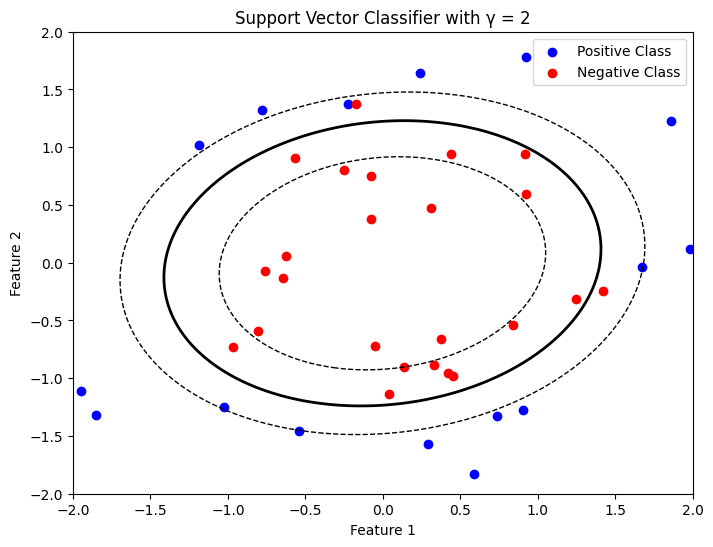

Accuracy: 0.95
Hinge Loss: 0.16618722728643096


In [ ]:
### QUESTION 6 ###
gamma = 0.9
n = X_train_2.shape[1]

# Decision variables:
P = cp.Variable((n, n), symmetric=True)
q = cp.Variable(n)
r = cp.Variable()
u = cp.Variable(len(X_train_2), nonneg=True)
v = cp.Variable(len(Y_train_2), nonneg=True)

x_thresh = cp.sum(cp.multiply(X_train_2 @ P, X_train_2), axis=1)+ X_train_2 @ q + r
y_thresh = cp.sum(cp.multiply(Y_train_2 @ P, Y_train_2), axis=1)+ Y_train_2 @ q + r

# Constraints
constraints = [
    x_thresh >= 1 - u,
    y_thresh <= -1 + v,
    u >= 0,
    v >= 0,
]

# Objective function
objective = cp.Minimize(cp.trace(P) + gamma*(cp.sum(u) + cp.sum(v)))

# Define problem and solve
problem = cp.Problem(objective, constraints)
result = problem.solve()

P_opt = P.value
q_opt = q.value
r_opt = r.value

# Plotting
plt.figure(figsize=(8, 6))

# Plot positive class (X_train_1)
plt.scatter(X_test_2[:, 0], X_test_2[:, 1], color='blue', label="Positive Class")

# Plot negative class (Y_train_1)
plt.scatter(Y_test_2[:, 0], Y_test_2[:, 1], color='red', label="Negative Class")

# Create a meshgrid for decision boundary
x_min, x_max = -2, 2
y_min, y_max = -2, 2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = np.c_[xx.ravel(), yy.ravel()]
Z_vals = np.sum(Z * (Z @ P_opt), axis=1) + Z @ q_opt + r_opt
Z_vals = Z_vals.reshape(xx.shape)

# Plot decision boundary
plt.contour(xx, yy, Z_vals, levels=[0], colors='black', linewidths=2, label="Decision Boundary")

# Plot slab boundaries
plt.contour(xx, yy, Z_vals, levels=[-1, 1], colors='black', linestyles='dashed', linewidths=1, label="Slab Boundaries")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Support Vector Classifier with γ = 2")
plt.legend()
plt.show()

import numpy as np

# Compute decision function values for test data
X_decision_values = np.diag(X_test_2 @ P_opt @ X_test_2.T) + X_test_2 @ q_opt + r_opt
Y_decision_values = np.diag(Y_test_2 @ P_opt @ Y_test_2.T) + Y_test_2 @ q_opt + r_opt

# Assign class labels (+1 for X_test_2, -1 for Y_test_2)
X_predicted_labels = np.sign(X_decision_values)
Y_predicted_labels = np.sign(Y_decision_values)

# Ground truth labels
X_true_labels = np.ones(len(X_test_2))
Y_true_labels = -np.ones(len(Y_test_2))

# Compute accuracy
correct_X = np.sum(X_predicted_labels == X_true_labels)
correct_Y = np.sum(Y_predicted_labels == Y_true_labels)
total_samples = len(X_test_2) + len(Y_test_2)
accuracy = (correct_X + correct_Y) / total_samples

# Compute hinge loss
X_hinge_loss = np.maximum(0, 1 - X_true_labels * X_decision_values).mean()
Y_hinge_loss = np.maximum(0, 1 - Y_true_labels * Y_decision_values).mean()
total_hinge_loss = (X_hinge_loss + Y_hinge_loss) / 2  # Average hinge loss

print("Accuracy:", accuracy)
print("Hinge Loss:", total_hinge_loss)

Non-linear semi-definite programming method works best for this dataset, where the y dataset is contained within a smaller ring, while the x consistently outside of this circle. This leads to both a very high classification accuracy and low hinge loss. Other methods such as kernels, k-nearest means, decision trees, and even deep neural networks can be used in this situation. Given the nature of the data these often more complicated forms are unnecessary.

# Question 7

In [ ]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

# Dataset 3
X_train_3 = np.array([[ 0.30920485,  0.74779523, -1.19805934, -1.4065875 ,  0.81773837,
        -1.30667592, -0.22120141,  0.07813527, -0.42443599,  0.03138162,
        -2.02716273, -0.20216417, -1.77093289,  0.19895122,  0.27524467,
        -0.9843448 , -0.31251963, -1.72018154, -2.05161935, -0.81445041,
         0.75566503, -1.61181827,  0.24942261,  0.43094924,  0.26285439,
        -1.49128776, -1.2378428 ,  0.15350841, -1.63601617, -0.03734756,
        -0.22413227],
       [-0.127041  ,  0.54957438,  1.40047603, -1.03687185,  1.64300265,
        -0.60711187,  1.00868763,  0.18433247,  1.30854456,  1.27867747,
        -0.07552655,  0.09829492, -0.15602456,  2.27694191,  0.58976897,
         1.29546509,  1.85361272, -0.11323539,  0.3295589 ,  0.03881959,
         0.62671139, -1.16122353,  0.37041953, -0.51610516,  0.08970487,
         0.68265883,  0.7264372 ,  0.8912278 ,  1.14409337,  0.53962298,
         0.94477311]]).T

Y_train_3 = np.array([[-0.48691402,  0.50954902,  1.35242892,  1.89600064, -0.33075371,
        -0.62663858, -0.85151619, -0.59739923,  0.15581821,  0.24130156,
         0.0081454 ,  1.01975478,  1.22467352,  0.51038341,  0.88796385,
         0.15940018, -0.1636123 ,  1.53916295, -0.6851801 , -0.42081847,
        -0.36004546,  1.10877664,  1.82124821, -0.04156698,  0.23092986,
         1.85584796, -0.34194837,  0.89063568, -0.99471418],
       [ 0.57259859, -1.66427178,  0.60859541, -0.42653506, -0.55325533,
        -0.45097084, -0.06022663,  0.27829883, -1.14573741, -1.74371889,
        -0.58656254, -0.39964896, -1.45537741, -1.09925804, -1.22007405,
        -1.05506347, -1.53782127, -0.40646646,  0.56462893, -1.03126372,
         0.03132026, -0.56596703, -0.46607732, -0.71850484, -1.16563865,
         0.39711336, -0.50298565, -0.73843955, -0.7858591 ]]).T

X_test_3 = np.array([[-1.55182484, -1.14359579, -0.28724359,  0.4860189 ,  0.59348201,
         0.20764271, -0.71978547, -0.52880272, -0.83190068, -0.17344159,
         0.11892081, -1.55268459, -0.97786341,  1.15004209, -1.55962329,
        -0.98048598, -0.73153577, -0.75993791, -0.22465612],
       [ 0.46910804,  0.76280671,  1.0525906 ,  1.96041925,  0.25278868,
         0.88856402,  1.72334673,  1.28542054,  0.93244079,  1.50362044,
         0.14210094, -0.3087488 ,  1.51041733, -0.46423271, -0.26480295,
         0.8478617 ,  1.24236135,  1.31112526,  1.70271788]]).T

Y_test_3 = np.array([[ 0.59260113, -0.87894137, -0.02974639,  1.7173351 , -0.09130345,
         1.31650323,  0.3712312 ,  1.39730283,  1.12756772,  0.62682189,
        -0.34408365,  1.33380816,  1.89457786, -0.31784745,  1.37086214,
         1.69531142, -0.53631325,  1.60097254,  0.98840214,  1.81872078,
         0.67050908],
       [-1.44842808,  0.65349306, -0.63475756, -0.17875463, -0.93824346,
        -1.10788814, -1.30192489,  0.39040035, -1.65289561, -2.14337167,
        -0.11501714, -0.73018114, -1.57392425, -1.493817  ,  0.22375044,
        -0.91174565, -0.20549059, -0.09531556, -1.75933045,  0.7346544 ,
        -1.01221609]]).T

<ipython-input-350-9190dc3f04df>:49: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z_vals, levels=[0], colors='black', linewidths=2, label="Decision Boundary")
<ipython-input-350-9190dc3f04df>:52: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z_vals, levels=[-1, 1], colors='black', linestyles='dashed', linewidths=1, label="Slab Boundaries")


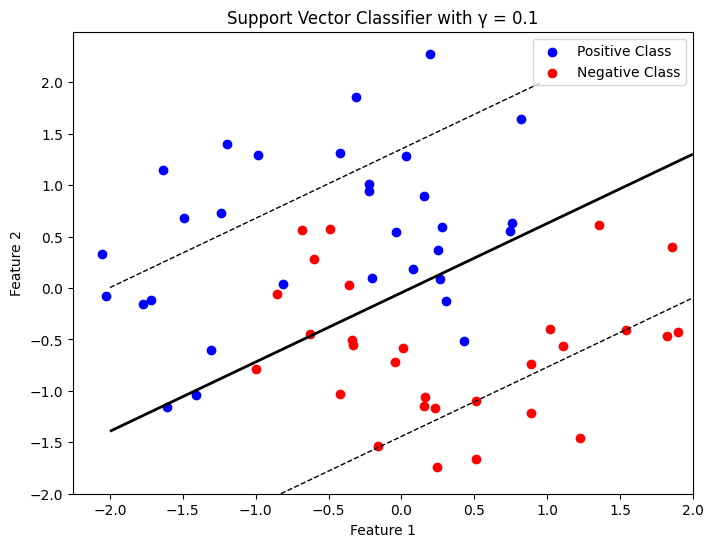

Accuracy: 0.8750
Precision: 0.8500
Recall: 0.8947
F1-score: 0.8718
Hinge Loss: 12.6226


In [ ]:
### QUESTION 7 ###
# Define variables
d = X_train_3.shape[1]  # Dimensionality
a = cp.Variable(d)
b = cp.Variable()
u = cp.Variable(len(X_train_3), nonneg=True)
v = cp.Variable(len(Y_train_3), nonneg=True)

# Regularization parameter
gamma = 0.1

# Constraints
constraints = [
    X_train_3 @ a - b >= 1 - u,  # Positive class constraints
    Y_train_3 @ a - b <= -(1 - v),  # Negative class constraints
    u >= 0,
    v >= 0
]

# Objective function
objective = cp.Minimize(cp.sum_squares(a) + gamma*(cp.sum(u) + cp.sum(v)))

# Solve the optimization problem
problem = cp.Problem(objective, constraints)
problem.solve()

# Extract the optimal values
a_opt = a.value
b_opt = b.value

# Plotting
plt.figure(figsize=(8, 6))

# Plot positive class (X_train_1)
plt.scatter(X_train_3[:, 0], X_train_3[:, 1], color='blue', label="Positive Class")

# Plot negative class (Y_train_1)
plt.scatter(Y_train_3[:, 0], Y_train_3[:, 1], color='red', label="Negative Class")

# Create a meshgrid for decision boundary
x_min, x_max = -2, 2
y_min, y_max = -2, 2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = np.c_[xx.ravel(), yy.ravel()]
Z_vals = Z @ a_opt - b_opt
Z_vals = Z_vals.reshape(xx.shape)

# Plot decision boundary
plt.contour(xx, yy, Z_vals, levels=[0], colors='black', linewidths=2, label="Decision Boundary")

# Plot slab boundaries
plt.contour(xx, yy, Z_vals, levels=[-1, 1], colors='black', linestyles='dashed', linewidths=1, label="Slab Boundaries")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Support Vector Classifier with γ = 0.1")
plt.legend()
plt.show()

#---TESTING---#
# Define proper class labels
y_train_labels = np.hstack([np.ones(len(X_train_3)), -np.ones(len(Y_train_3))])
y_test_labels = np.hstack([np.ones(len(X_test_3)), -np.ones(len(Y_test_3))])

# Combine test data
X_test_combined = np.vstack([X_test_3, Y_test_3])

# Compute predictions
predictions = np.sign(X_test_combined @ a_opt - b_opt)  # Decision rule

# Compute accuracy
accuracy = np.mean(predictions == y_test_labels)

# Compute precision, recall, and F1-score
true_positives = np.sum((predictions == 1) & (y_test_labels == 1))
false_positives = np.sum((predictions == 1) & (y_test_labels == -1))
false_negatives = np.sum((predictions == -1) & (y_test_labels == 1))

precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Compute hinge loss
hinge_loss = np.sum(np.maximum(0, 1 - y_test_labels * (X_test_combined @ a_opt - b_opt)))

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1_score:.4f}")
print(f"Hinge Loss: {hinge_loss:.4f}")

For this first part of question 7 we see the difference between this and question 3. Now that there is much more overlap between the datasets, even though they are generally still separable via a linear classifier, a much lower penalising function of 0.1 to 0.2 allows the problem to have a high accuracy. If we increase gamma too much, we risk missing out many misclassifying a sizeable number of datapoints.

Training Accuracy: 71%
Training Hinge Loss: 1.4019


<ipython-input-351-791be99a89ae>:98: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z_vals, levels=[0], colors='black', linewidths=2, label="Decision Boundary")


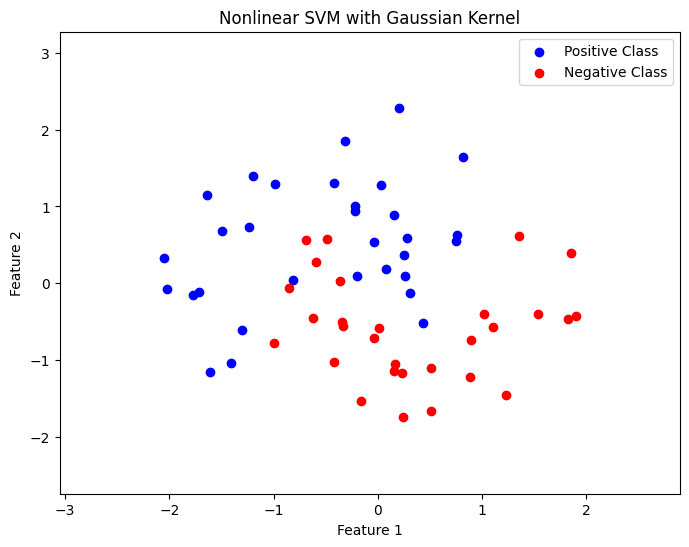

In [ ]:
# Define Gaussian kernel
def gaussian_kernel(X, Y, sigma=1.0):
    pairwise_sq_dists = np.sum(X**2, axis=1).reshape(-1, 1) + np.sum(Y**2, axis=1) - 2 * np.dot(X, Y.T)
    return np.exp(-pairwise_sq_dists / (2 * sigma ** 2))

# Compute the kernel matrix
K_pos = gaussian_kernel(X_train_3, X_train_3)
K_neg = gaussian_kernel(Y_train_3, Y_train_3)

epsilon = 1e-3  # Small regularization parameter
K_pos += epsilon * np.eye(K_pos.shape[0])
K_neg += epsilon * np.eye(K_neg.shape[0])

# Number of training examples
n_pos = X_train_3.shape[0]
n_neg = Y_train_3.shape[0]

# Define variables for dual formulation
alphas_pos = cp.Variable(n_pos, nonneg=True)
alphas_neg = cp.Variable(n_neg, nonneg=True)

# Regularization parameter (C)
C = 1.0

# Objective function (dual form of the SVM with kernel)
objective = cp.Minimize(0.5 * cp.quad_form(alphas_pos, K_pos) + 0.5 * cp.quad_form(alphas_neg, K_neg) - cp.sum(alphas_pos) - cp.sum(alphas_neg))

# Constraints for the dual problem (Lagrange multipliers)
constraints = [
    alphas_pos >= 0,
    alphas_neg >= 0,
    cp.sum(alphas_pos) - cp.sum(alphas_neg) == 0  # Balance the positive and negative classes
]

# Solve the problem
problem = cp.Problem(objective, constraints)
problem.solve()

# Extract the optimised alphas
alphas_pos_opt = alphas_pos.value
alphas_neg_opt = alphas_neg.value

# Create a function to compute the decision function (linear combination of kernel evaluations)
def decision_function(X, alphas_pos, alphas_neg, X_train_pos, X_train_neg, kernel_func):
    return np.sum(alphas_pos * kernel_func(X, X_train_pos), axis=1) + np.sum(alphas_neg * kernel_func(X, X_train_neg), axis=1)

# Predict the labels (1 if decision function > 0, -1 otherwise)
def predict(X, alphas_pos, alphas_neg, X_train_pos, X_train_neg, kernel_func):
    decision_vals = decision_function(X, alphas_pos, alphas_neg, X_train_pos, X_train_neg, kernel_func)
    return np.sign(decision_vals)

# Hinge Loss
def hinge_loss(X, y, alphas_pos, alphas_neg, X_train_pos, X_train_neg, kernel_func):
    decision_vals = decision_function(X, alphas_pos, alphas_neg, X_train_pos, X_train_neg, kernel_func)
    return np.mean(np.maximum(0, 1 - y * decision_vals))

# Calculate misclassified points
def classified_points(X, y, alphas_pos, alphas_neg, X_train_pos, X_train_neg, kernel_func):
    predictions = predict(X, alphas_pos, alphas_neg, X_train_pos, X_train_neg, kernel_func)
    classified = np.sum(predictions != y)  # Count misclassified points
    return classified

# Assign labels
y_train_pos = np.ones(n_pos)
y_train_neg = -np.ones(n_neg)

# Combine training data for evaluation
X_train_combined = np.vstack([X_train_3, Y_train_3])
y_train_combined = np.concatenate([y_train_pos, y_train_neg])

# Evaluate the performance on training data
# Needs to be fixed...
train_classified_points = classified_points(X_train_combined, y_train_combined, alphas_pos_opt, alphas_neg_opt, X_train_3, Y_train_3, gaussian_kernel)
train_hinge_loss = hinge_loss(X_train_combined, y_train_combined, alphas_pos_opt, alphas_neg_opt, X_train_3, Y_train_3, gaussian_kernel)

print(f"Training Accuracy: {100-train_classified_points}%")
print(f"Training Hinge Loss: {train_hinge_loss:.4f}")

# Plotting decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X_train_3[:, 0], X_train_3[:, 1], color='blue', label="Positive Class")
plt.scatter(Y_train_3[:, 0], Y_train_3[:, 1], color='red', label="Negative Class")

# Create meshgrid for plotting decision boundary
x_min, x_max = X_train_combined[:, 0].min() - 1, X_train_combined[:, 0].max() + 1
y_min, y_max = X_train_combined[:, 1].min() - 1, X_train_combined[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = np.c_[xx.ravel(), yy.ravel()]

# Evaluate decision boundary using kernel evaluations
Z_vals = np.array([np.sum(alphas_pos_opt * gaussian_kernel(Z_point.reshape(1, -1), X_train_3)) +
                   np.sum(alphas_neg_opt * gaussian_kernel(Z_point.reshape(1, -1), Y_train_3))
                   for Z_point in Z])

Z_vals = Z_vals.reshape(xx.shape)

# Plot decision boundary
plt.contour(xx, yy, Z_vals, levels=[0], colors='black', linewidths=2, label="Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Nonlinear SVM with Gaussian Kernel")
plt.legend()
plt.show()

Kernel method worked quite well, but displaying the boundary runs into the same problem as question 5.

<ipython-input-352-a8e7fdec9d90>:53: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z_vals, levels=[0], colors='black', linewidths=2, label="Decision Boundary")
<ipython-input-352-a8e7fdec9d90>:56: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z_vals, levels=[-1, 1], colors='black', linestyles='dashed', linewidths=1, label="Slab Boundaries")


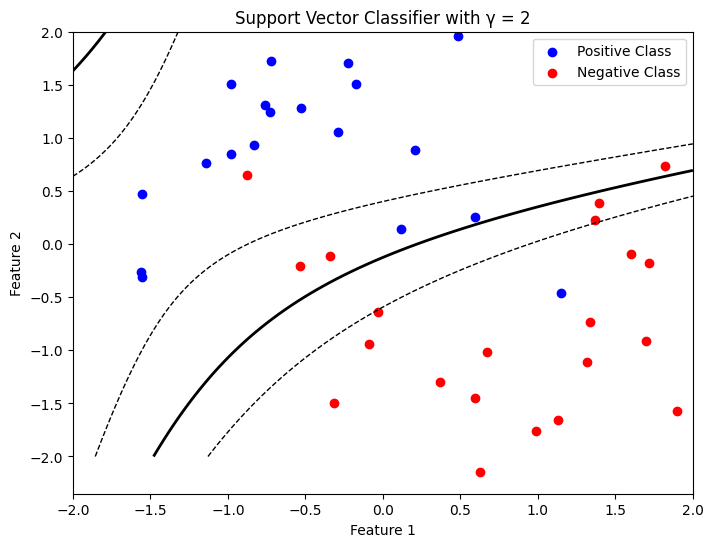

Accuracy: 0.875
Hinge Loss: 0.31872789585483274


In [ ]:
# Now for solving the convex optimisation problem
gamma = 0.9
n = X_train_3.shape[1]

# Decision variables:
P = cp.Variable((n, n), symmetric=True)
q = cp.Variable(n)
r = cp.Variable()
u = cp.Variable(len(X_train_3), nonneg=True)
v = cp.Variable(len(Y_train_3), nonneg=True)

x_thresh = cp.sum(cp.multiply(X_train_3 @ P, X_train_3), axis=1)+ X_train_3 @ q + r
y_thresh = cp.sum(cp.multiply(Y_train_3 @ P, Y_train_3), axis=1)+ Y_train_3 @ q + r

# Constraints
constraints = [
    x_thresh >= 1 - u,
    y_thresh <= -1 + v,
    u >= 0,
    v >= 0,
]

# Objective function
objective = cp.Minimize(cp.trace(P) + gamma*(cp.sum(u) + cp.sum(v)))

# Define the problem and solve
problem = cp.Problem(objective, constraints)
result = problem.solve()

# Extract the optimal values
P_opt = P.value
q_opt = q.value
r_opt = r.value

# Plotting
plt.figure(figsize=(8, 6))

# Plot positive class (X_train_1)
plt.scatter(X_test_3[:, 0], X_test_3[:, 1], color='blue', label="Positive Class")

# Plot negative class (Y_train_1)
plt.scatter(Y_test_3[:, 0], Y_test_3[:, 1], color='red', label="Negative Class")

# Create a meshgrid for decision boundary
x_min, x_max = -2, 2
y_min, y_max = -2, 2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = np.c_[xx.ravel(), yy.ravel()]
Z_vals = np.sum(Z * (Z @ P_opt), axis=1) + Z @ q_opt + r_opt
Z_vals = Z_vals.reshape(xx.shape)

# Plot decision boundary
plt.contour(xx, yy, Z_vals, levels=[0], colors='black', linewidths=2, label="Decision Boundary")

# Plot slab boundaries
plt.contour(xx, yy, Z_vals, levels=[-1, 1], colors='black', linestyles='dashed', linewidths=1, label="Slab Boundaries")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Support Vector Classifier with γ = 2")
plt.legend()
plt.show()

# Compute decision function values for test data
X_decision_values = np.diag(X_test_3 @ P_opt @ X_test_3.T) + X_test_3 @ q_opt + r_opt
Y_decision_values = np.diag(Y_test_3 @ P_opt @ Y_test_3.T) + Y_test_3 @ q_opt + r_opt

# Assign class labels (+1 for X_test_2, -1 for Y_test_2)
X_predicted_labels = np.sign(X_decision_values)
Y_predicted_labels = np.sign(Y_decision_values)

# Ground truth labels
X_true_labels = np.ones(len(X_test_3))
Y_true_labels = -np.ones(len(Y_test_3))

# Compute accuracy
correct_X = np.sum(X_predicted_labels == X_true_labels)
correct_Y = np.sum(Y_predicted_labels == Y_true_labels)
total_samples = len(X_test_3) + len(Y_test_3)
accuracy = (correct_X + correct_Y) / total_samples

# Compute hinge loss
X_hinge_loss = np.maximum(0, 1 - X_true_labels * X_decision_values).mean()
Y_hinge_loss = np.maximum(0, 1 - Y_true_labels * Y_decision_values).mean()
total_hinge_loss = (X_hinge_loss + Y_hinge_loss) / 2  # Average hinge loss

print("Accuracy:", accuracy)
print("Hinge Loss:", total_hinge_loss)

In the same style as question 6, an SDP non-linear classifier works extremely well, with a very low hinge loss.

# Question 8

In [ ]:
import numpy as np
import cvxpy as cp
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Dataset 4
X_4 = np.array([[ 3.496052,  4.042794,  2.79643 ,  5.085416,  4.240754,  3.737034,
         3.343466,  3.786328,  4.965464,  3.826312,  4.208512,  4.620014,
         3.242036,  5.14892 ,  2.50782 ,  3.528098,  4.719288,  5.184396,
         5.086984,  3.900596],
       [-2.938138,  0.507444,  2.100728, -0.066346,  0.308112,  1.280272,
         3.851106,  0.200998,  0.104566, -1.468236, -2.356998,  2.863952,
         1.513512, -2.811326,  1.007538,  1.21716 ,  1.255772,  1.17943 ,
        -2.121112, -0.276458]]).T

Y_4 = np.array([[-4.47517 , -3.616592, -3.222338, -1.616118, -5.363638, -3.54466 ,
        -1.163848, -1.032822, -1.36367 , -1.990576, -1.959902, -0.24304 ,
        -1.288602, -0.81389 , -1.89679 , -1.068004, -2.55192 , -4.272996,
        -1.77429 ,  0.303408],
       [ 2.363466,  4.178916,  2.78908 ,  0.5145  ,  1.867194,  2.923438,
         4.613742,  0.950796,  0.377692,  1.884344,  1.461572, -0.978432,
         3.36434 ,  2.866108,  3.021634,  1.55918 ,  1.496068,  1.593088,
         2.453626,  1.409632]]).T

Z_4 = np.array([[ 1.710198,  2.58181 ,  0.581826, -2.765266,  2.969792,  1.069866,
        -1.743714,  1.217356,  2.143554, -2.254784, -3.259284,  2.706466,
         0.898268,  0.058898, -2.59896 , -3.25409 ,  4.040442, -3.34033 ,
        -3.096212, -0.716478],
       [-3.13698 , -4.892258, -3.686858, -4.64716 , -4.04887 , -3.83376 ,
        -4.468408, -4.850902, -3.36238 , -4.180288, -6.078254, -4.428228,
        -3.690582, -4.903822, -4.286912, -4.954782, -3.865414, -3.960376,
        -5.242314, -2.98557 ]]).T

Classifier for X vs Z: [0.48456745 1.02472949] 1.3858496412716448
Classifier for X vs Y: [ 0.87805693 -0.16016347] -1.040637942407467
Classifier for Y vs Z: [0.06127036 0.98199141] 1.9757029708793958


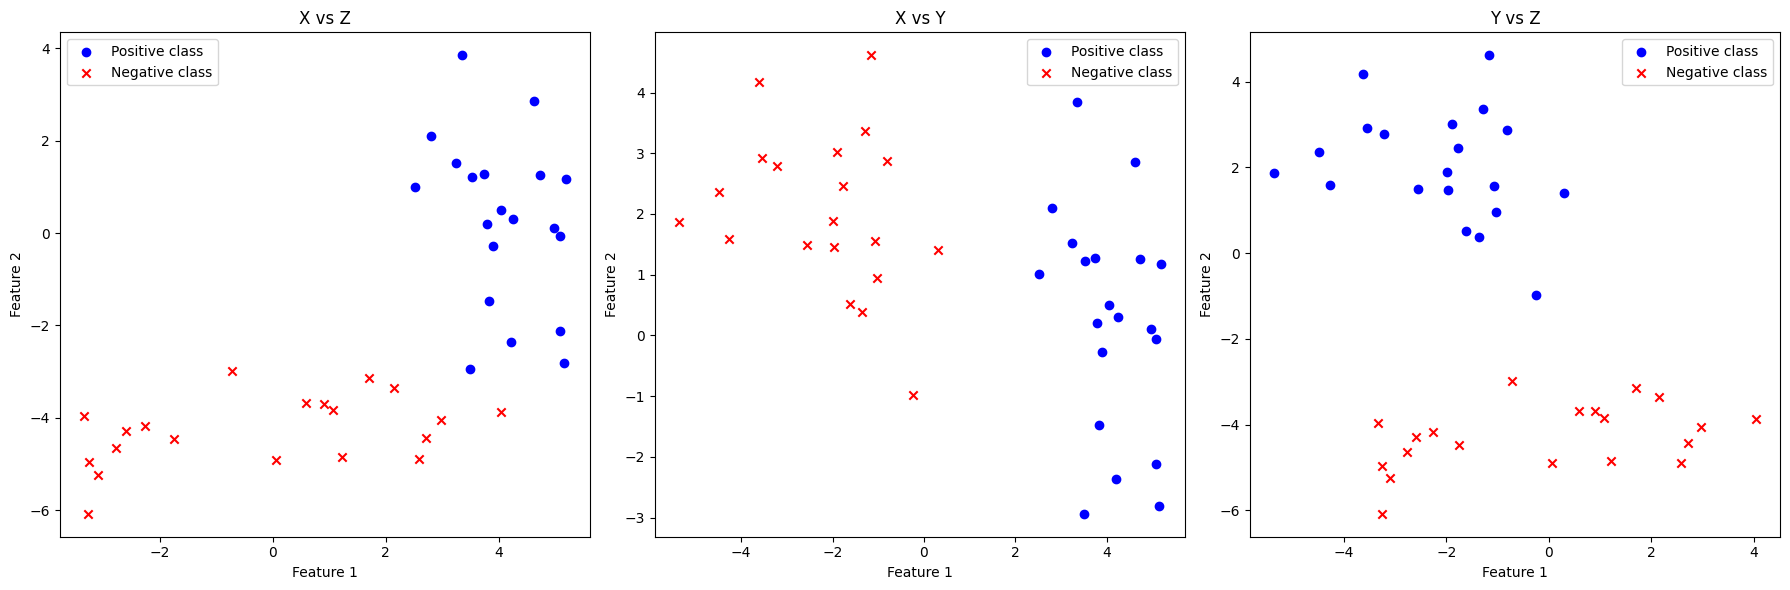

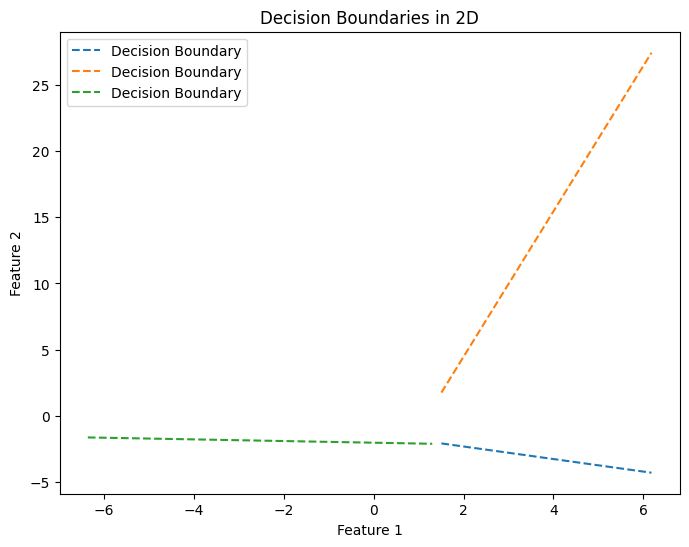

Accuracy for X vs Z classifier: 100.00%
Accuracy for X vs Y classifier: 100.00%
Accuracy for Y vs Z classifier: 100.00%


In [ ]:
def train_svm(X_pos, X_neg):
    """Train a linear SVM using CVXPY."""
    X = np.vstack([X_pos, X_neg])
    y = np.hstack([np.ones(len(X_pos)), -np.ones(len(X_neg))])

    n_features = X.shape[1]
    w = cp.Variable(n_features)
    b = cp.Variable()
    xi = cp.Variable(len(X), nonneg=True)
    C = 1  # Regularisation parameter

    objective = cp.Minimize(0.5 * cp.norm(w) ** 2 + C * cp.sum(xi))
    constraints = [y[i] * (X[i] @ w + b) >= 1 - xi[i] for i in range(len(X))]

    prob = cp.Problem(objective, constraints)
    prob.solve()

    return w.value, b.value

# Train classifiers
w_xz, b_xz = train_svm(X_4, Z_4)
w_xy, b_xy = train_svm(X_4, Y_4)
w_yz, b_yz = train_svm(Y_4, Z_4)

print("Classifier for X vs Z:", w_xz, b_xz)
print("Classifier for X vs Y:", w_xy, b_xy)
print("Classifier for Y vs Z:", w_yz, b_yz)

# Function to plot the data for each pair of classes
def plot_data(X_pos, X_neg, ax, title):
    ax.scatter(X_pos[:, 0], X_pos[:, 1], color='blue', label='Positive class', marker='o')
    ax.scatter(X_neg[:, 0], X_neg[:, 1], color='red', label='Negative class', marker='x')
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_title(title)
    ax.legend()

# Create subplots for all three class pairs
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot data for X vs Z
plot_data(X_4[:, :2], Z_4[:, :2], axes[0], "X vs Z")

# Plot data for X vs Y
plot_data(X_4[:, :2], Y_4[:, :2], axes[1], "X vs Y")

# Plot data for Y vs Z
plot_data(Y_4[:, :2], Z_4[:, :2], axes[2], "Y vs Z")

# Show the plot
plt.tight_layout()
plt.show()

# Function to plot the decision boundary as a line in 2D
def plot_decision_boundary_line(X_pos, X_neg, w, b, ax):
    # Define the grid for plotting the decision surface in 2D
    x_min, x_max = X_pos[:, 0].min() - 1, X_pos[:, 0].max() + 1
    y_min, y_max = X_pos[:, 1].min() - 1, X_pos[:, 1].max() + 1

    # Create a grid of points for x-axis
    xx = np.linspace(x_min, x_max, 100)

    # Calculate the decision boundary line for y (second feature)
    yy = -(w[0] * xx + b) / w[1]

    # Plot the decision boundary line
    ax.plot(xx, yy, label=f'Decision Boundary', linestyle='--')

# Plotting all decision boundaries on one plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot for X vs Z (using feature 1 and feature 2)
plot_decision_boundary_line(X_4[:, :2], Z_4[:, :2], w_xz, b_xz, ax)

# Plot for X vs Y (using feature 1 and feature 2)
plot_decision_boundary_line(X_4[:, :2], Y_4[:, :2], w_xy, b_xy, ax)

# Plot for Y vs Z (using feature 1 and feature 2)
plot_decision_boundary_line(Y_4[:, :2], Z_4[:, :2], w_yz, b_yz, ax)

# Add labels and legend
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_title("Decision Boundaries in 2D")
ax.legend()

# Show the plot
plt.show()

def calculate_accuracy(X_pos, X_neg, w, b):
    # Combine the positive and negative examples
    X = np.vstack([X_pos, X_neg])
    y_true = np.hstack([np.ones(len(X_pos)), -np.ones(len(X_neg))])

    # Predict using the decision boundary: w[0]*x + w[1]*y + b = 0
    predictions = np.sign(np.dot(X, w) + b)  # Predict based on the sign of the decision boundary

    # Calculate accuracy
    accuracy = np.mean(predictions == y_true)  # Fraction of correct predictions
    return accuracy

# Calculate the accuracy for each classifier
accuracy_xz = calculate_accuracy(X_4[:, :2], Z_4[:, :2], w_xz, b_xz)
accuracy_xy = calculate_accuracy(X_4[:, :2], Y_4[:, :2], w_xy, b_xy)
accuracy_yz = calculate_accuracy(Y_4[:, :2], Z_4[:, :2], w_yz, b_yz)

# Display the results
print(f"Accuracy for X vs Z classifier: {accuracy_xz * 100:.2f}%")
print(f"Accuracy for X vs Y classifier: {accuracy_xy * 100:.2f}%")
print(f"Accuracy for Y vs Z classifier: {accuracy_yz * 100:.2f}%")

We can see that these 3 datasets are seperable by linear datasets. This means we can find classifiers between the x,y then x,z and y,z. This provides great separation between the datasets.  